This notebook contains the basemodel prepared on the dataset to explore the data and come with a base model for understanding. I have
performed below tasks:
    
    1) Data Exploration
    2) Data Pre-processing (handling "-1" and null values)
    3) Normalizing the feature values using StandardScalar functions in scikit-learn
    4) Performing feature selection using random forest classifier feature importance
    5) Training the dataset over basic state of the art classification models
    6) Interpreting baseline model results and using them for the final model for the better results
    
 Intution: I am starting this problem as a binary classification just to understand the data, but, I sense that our job is to just identify "toilet" I may have to handle it as an outlier detection problem (like using OneClassSVM() that uses concept of cost sensetive learning). The more research will be done while making the final model

In [74]:
# Importing basic Dependencies
import pandas as pd
import numpy as np 

Data Exploration
   
    1) Loading the dataset using pandas csv command
    2) Checking out the features and samples of the data (shape)
    3) Checking out the first few records
    4) As I am dealing with supervised classification problem, the label columns which is at the first column of the dataset has to be verified. We are supposed to classify the labels as "toilet" and "not-toilet"

In [205]:
# Loading the data
data = pd.read_csv('ml_problem_set.csv')

In [206]:
# Understanding the shape of the data
data.shape

(3163, 218)

In [207]:
#checking out the first few samples
data.head(10)

,label,house_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216
0,spigot,house_126,13.007144,12.230354,4,5,6.197,6.484,0.977778,8.488526,...,0.591493,0.705452,0.633203,0.443873,0.406736,0.451285,0.411402,0.282912,0.285625,0.306219
1,spigot,house_126,9.230357,-1.000000,-1,1,14.176,10.695,0.928571,0.000000,...,0.427394,0.689973,0.706920,0.352133,0.313228,0.506318,0.464877,0.194555,0.193622,0.339895
2,spigot,house_126,9.258934,10.839287,1,3,8.978,7.999,1.000000,6.842413,...,0.547300,0.732130,0.652021,0.409212,0.394238,0.493608,0.407968,0.264117,0.247763,0.298353
3,laundrytub,house_25,1.687500,2.562500,2,3,4.764,3.699,0.941176,1.467188,...,0.554086,0.273246,0.811351,0.014543,-0.430410,0.034226,0.181226,0.293240,0.273289,0.195252
4,laundrytub,house_25,1.887500,2.776779,3,1,3.084,4.764,0.944444,1.607542,...,0.595937,0.410507,0.923314,0.269123,-0.036309,0.433407,0.424058,0.584138,0.445210,0.307080
5,shower,house_64,-1.000000,5.158929,-1,-1,3.026,7.992,0.914286,0.000000,...,-1.392351,0.634925,1.486128,0.547370,0.938872,1.617265,1.297368,0.280025,0.273351,0.361752
6,shower,house_64,-1.000000,-1.000000,-1,-1,3.150,3.006,1.000000,0.000000,...,-0.496755,1.244954,1.179685,-0.057512,-0.023149,0.862283,0.792202,-0.158902,0.081314,0.336621
7,shower,house_64,-1.000000,-1.000000,-1,-1,3.006,3.028,1.000000,0.000000,...,-0.472997,0.939928,1.498492,-0.307549,0.167246,0.875433,0.782044,0.100265,0.173034,0.393343
8,shower,house_64,-1.000000,-1.000000,-1,-1,3.067,3.007,1.000000,0.000000,...,-0.247817,1.210548,1.263601,-0.131124,0.036350,0.903258,0.630470,-0.074563,0.123094,0.514758
9,shower,house_64,-1.000000,-1.000000,-1,-1,3.088,3.007,0.967742,0.000000,...,-0.304559,1.228364,1.316550,-0.063319,-0.040352,0.869791,0.681914,-0.041953,0.169518,0.550178


As it can be seen from the above samples, only the "house_id" and "label" are categorial and rest are continous

As this is basemodel, dropping the "house_id" column it seemes irrelevant for the "label" classification

There are missing values loaded as "-1". As of now replacing them with "NaN" values and dropping them

Next, I will be encoding the categorial "label" into numerical (though there are various technqiues, as of now I am encoding them manually)

In [208]:
# At first, we are seeing how many samples are there for each "label" type
data["label"].value_counts()

sink          1361
shower         741
bathtub        453
toilet         382
laundrytub     176
spigot          50
Name: label, dtype: int64

#### Data Prepration

In [209]:
# replacing the missing values i.e. "-1" with "NaN" values
data = data.replace(-1,np.nan)

In [210]:
# Dropping rows containing null values - as of now we are dropping, will be analyzed further in the final model
data = data.dropna()
#checking out the new shape- how many rows lefft
data.shape

(1358, 218)

As my task is to just classify the data which has "toilet" and "not a toilet", I am handling it as a binary classification problem, Therefore, I am encoding all "toilet" labels as "0" and rest of the labels as "1"

In [211]:
# Encoding the categorial labels
data['label'].replace({'toilet':0,'sink':1,'shower':1,'bathtub':1,'laundrytub':1,'spigot':1},inplace=True)

In [213]:
#checking out again the first few records to make sure that changes are observed
data.head()

,label,house_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216
0,1,house_126,13.007144,12.230354,4.0,5.0,6.197,6.484,0.977778,8.488526,...,0.591493,0.705452,0.633203,0.443873,0.406736,0.451285,0.411402,0.282912,0.285625,0.306219
2,1,house_126,9.258934,10.839287,1.0,3.0,8.978,7.999,1.000000,6.842413,...,0.547300,0.732130,0.652021,0.409212,0.394238,0.493608,0.407968,0.264117,0.247763,0.298353
3,1,house_25,1.687500,2.562500,2.0,3.0,4.764,3.699,0.941176,1.467188,...,0.554086,0.273246,0.811351,0.014543,-0.430410,0.034226,0.181226,0.293240,0.273289,0.195252
4,1,house_25,1.887500,2.776779,3.0,1.0,3.084,4.764,0.944444,1.607542,...,0.595937,0.410507,0.923314,0.269123,-0.036309,0.433407,0.424058,0.584138,0.445210,0.307080
20,1,house_5,0.598215,0.596429,21.0,21.0,5.264,5.552,0.926829,0.403125,...,-0.170150,-0.977168,-1.611767,-1.201917,-0.921476,-0.819959,-0.419842,-0.203723,0.200655,0.781734


In [214]:
#Checking again the number of samples of each class "Class 0 - toilet" and "Class 1 - "Not a Toilet"
data["label"].value_counts()

1    1172
0     186
Name: label, dtype: int64

In [215]:
#Dropping the "house_id" column - seems unimportant as of now
data.drop(['house_id'],axis=1,inplace = True)

In [216]:
# Checking out the shape- we can observe that one column is decrease as we dropped the "house_id" column
data.shape

(1358, 217)

In [144]:
#Seperating the data as features and labels
original_features=data.iloc[:,1:]
labels = data.iloc[:,0:1]

#### Feature Engineering - Feature Normalization and Feature Selection

In [218]:
#Importing Scikit learn libraries

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#Normalizing Train Data Features
scaler_features = scaler.fit(original_features)
normalized_features = scaler_features.transform(semi_features)

In [219]:
#Checking out the whether the features are normalzied - Observe Column 6 in the second cell and here to find difference
pd.DataFrame(normalized_features).head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,0.273564,0.337442,0.081633,0.089286,0.241643,0.211009,0.961254,0.377223,0.348271,0.143219,...,0.603409,0.444102,0.502134,0.558852,0.501970,0.560687,0.396166,0.413017,0.546973,0.590583
1,0.194110,0.298723,0.020408,0.053571,0.451974,0.302949,1.000000,0.304071,0.276357,0.178332,...,0.594784,0.449806,0.506343,0.552675,0.499769,0.570761,0.395281,0.407852,0.531820,0.587554
2,0.033613,0.068343,0.040816,0.053571,0.133263,0.041995,0.897436,0.065201,0.130835,0.137757,...,0.596108,0.351691,0.541980,0.482339,0.354526,0.461410,0.336896,0.415855,0.542036,0.547846
3,0.037853,0.074308,0.061224,0.017857,0.006202,0.106627,0.903134,0.071438,0.134411,0.069869,...,0.604276,0.381039,0.567023,0.527709,0.423938,0.556431,0.399425,0.495792,0.610841,0.590915
4,0.010523,0.013619,0.428571,0.375000,0.171078,0.154448,0.872420,0.017915,0.110400,0.096400,...,0.454755,0.084339,0.000000,0.265549,0.268036,0.258080,0.182121,0.279293,0.512967,0.773721


There are almost 216 features. All of them are unknown to me in terms of domain knowledge. Hence, I am using all the features for the feature selection using RandomForesTrees.
RandomForestTress is the state of the art techniques for the feature selection. It ranks all the features in the order of their importances adding to classify the label
One can select the top "K" important features that are required for the classification model

Reference: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

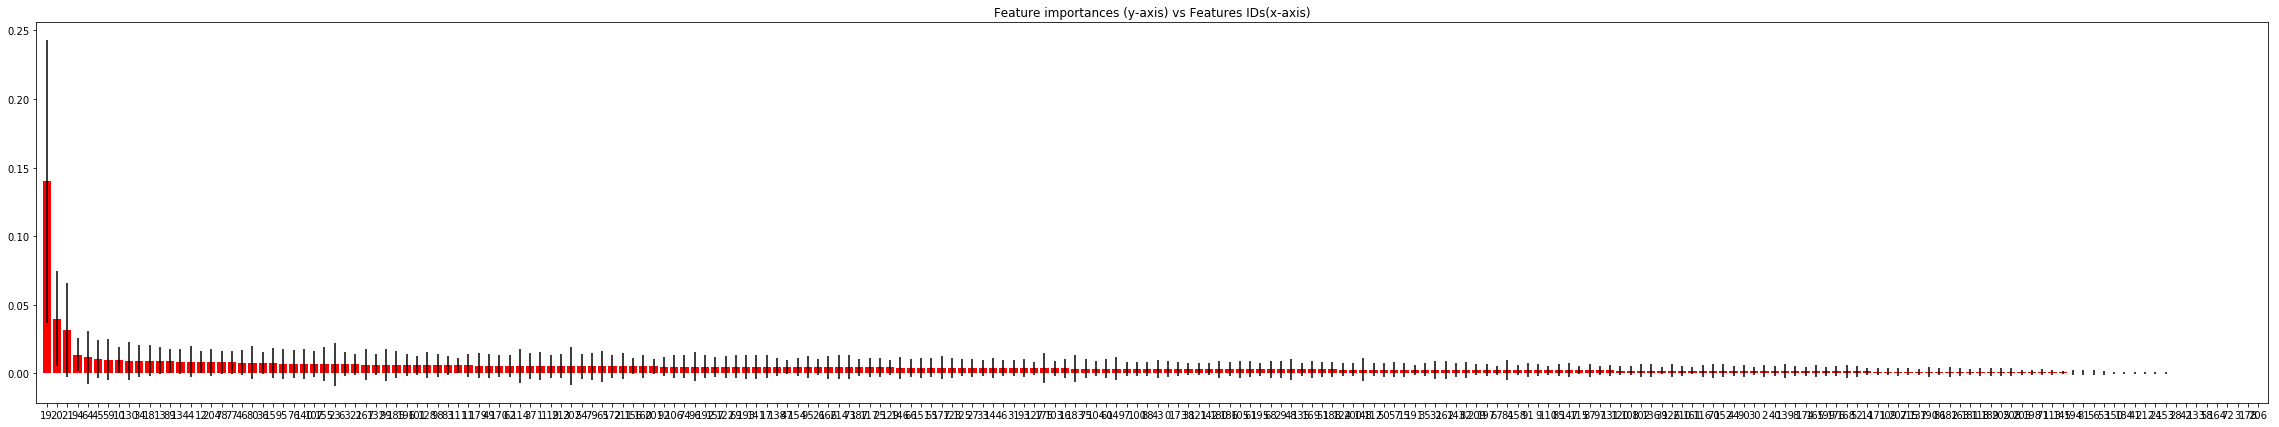

In [220]:
# Importing Matplotlib for plotting the feature importance graph

import matplotlib.pylab as plt


def FeatureSelection(myinputX, myinputY):

    labels = np.array(myinputY).astype(int).ravel()
    inputX = np.array(myinputX)
    
    #Random Forest Model
    model = RandomForestClassifier(random_state = 0)
    model.fit(inputX,labels)
    importances = model.feature_importances_
    
    
    #Plotting the Features agains their importance scores
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
    plt.figure(figsize = (40,7))
    plt.title("Feature importances (y-axis) vs Features IDs(x-axis)")
    plt.bar(range(inputX.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(inputX.shape[1]), indices)
    plt.xlim([-1, inputX.shape[1]])
    plt.show()
    
    # Selecting top featueres which have higher importance values = here we can find "80" features
    # I am changing number of features manually as of now. One has to find the tradeoff
    
    
    myinputX = pd.DataFrame(myinputX)
    newX = myinputX.iloc[:,model.feature_importances_.argsort()[::-1][:80]]
    
    # Converting the X dataframe into tensors and returning the reduced feature set
    myX = newX.as_matrix()

    return myX

# Reduced Feature Set
reduced_features  = FeatureSelection(normalized_features,labels)

The above graphs displays the "plot" of the importance of each feature with respect to the label. The selection criteria can be made using a recurisve algorithm that removes the reduandant and irrelevant features. As of now I am selecting top "80" features. And the below cell is to verify whether the features are reduced to "80"

In [221]:
pd.DataFrame(reduced_features).head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.191710,0.288241,0.242407,0.058908,0.696945,0.559075,0.643178,0.436906,0.743709,0.952264,...,0.474513,0.400314,0.166867,0.106966,0.025561,0.244954,0.138743,0.546973,0.181652,0.121444
1,0.196891,0.227297,0.205501,0.065719,0.621295,0.500836,0.553311,0.400956,0.705988,0.896717,...,0.450568,0.534241,0.187478,0.021968,0.013650,0.285403,0.034776,0.531820,0.417778,0.006942
2,0.134737,0.086778,0.099085,0.076091,0.662657,0.545788,0.546692,0.205553,0.812276,0.944147,...,0.421828,0.359710,0.222237,0.028138,0.031813,0.050687,0.031508,0.542036,0.540328,0.030361
3,0.139896,0.089709,0.097561,0.017724,0.696272,0.565252,0.555887,0.211052,0.763075,0.961126,...,0.608810,0.385490,0.250406,0.029847,0.023197,0.024088,0.046858,0.610841,0.482903,0.036650
4,0.160622,0.076166,0.067841,0.159022,0.295233,0.553244,0.273694,0.157908,0.713775,0.936753,...,0.592255,0.515539,0.100719,0.047757,0.149613,0.029822,0.042244,0.512967,0.209132,0.074912


#### Baseline Models - Model Training and Testing

I have performed below steps for model training and testing

  1) Using train_test_split - splitting the dataset into 85:15 ratio
  
  2) I made sure there are "toilet" samples in both training and testing dataset
  
  3) I have used a python dictionary to take 5 basic classifiers and performed operatio using training and testing set one by one
  
  4) The classification metrics report and the confusion matrix are used as of now to interpret the high level results

In [222]:
#Importing the sklearn dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Train - Test Split
X_train, X_test, y_train, y_test  = train_test_split(
        reduced_features, 
        labels.as_matrix(),
        train_size=0.85, 
        random_state=1234)

#Checking whether both the training and testing set has acceptable number of "toilet" samples
print ("Number of samples of each class label in training dataset is:")
print (np.unique(y_train, return_counts=True))
print ("Number of samples of each class label in testing dataset is:")
print (np.unique(y_test, return_counts=True))

# Making a dictionary kind of pipeline for few basic classifiers- randomstate to reproduce the results
Classifiers =  {"GB": {"f": GradientBoostingClassifier(random_state = 42)},
                "DT": {"f": DecisionTreeClassifier(random_state = 42)},
                "LR": {"f": LogisticRegression(random_state = 42)},
                "NB": {"f": GaussianNB()},
                "SVC": {"f": SVC(random_state = 42)}}
                
#Preparing the metrics dictionary that will be used in the evaluation
measures = {"class_report": metrics.classification_report, "conf_mat": metrics.confusion_matrix}


#Models Training and prediction - one by one
for model in Classifiers.keys():

    # Fit the Classifiers using the training dataset
    Classifiers[model]["f"].fit(X_train, y_train.ravel())
    
    # Predict
    Classifiers[model]["c"] = Classifiers[model]["f"].predict(X_test)
    
    # Evaluate each model in Regressors
    print ("Results of the classifier model {}".format(model))
    print ("Confusion Matrix for the classifier model {}".format(model))
    
    #printing the metrics results
    for measure in measures.keys():
        print (measures[measure](y_test.ravel(), Classifiers[model]["c"]))

Number of samples of each class label in training dataset is:
(array([0, 1], dtype=int64), array([167, 987], dtype=int64))
Number of samples of each class label in testing dataset is:
(array([0, 1], dtype=int64), array([ 19, 185], dtype=int64))
Results of the classifier model GB
Confusion Matrix for the classifier model GB
[[  9  10]
 [  3 182]]
             precision    recall  f1-score   support

          0       0.75      0.47      0.58        19
          1       0.95      0.98      0.97       185

avg / total       0.93      0.94      0.93       204

Results of the classifier model LR
Confusion Matrix for the classifier model LR
[[  0  19]
 [  0 185]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        19
          1       0.91      1.00      0.95       185

avg / total       0.82      0.91      0.86       204

Results of the classifier model NB
Confusion Matrix for the classifier model NB
[[  9  10]
 [ 55 130]]
             pre

c:\users\manojkumar_meno\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Results of the classifier model SVC
Confusion Matrix for the classifier model SVC
[[  0  19]
 [  0 185]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        19
          1       0.91      1.00      0.95       185

avg / total       0.82      0.91      0.86       204



As it can be seen that GradientBoost Classifier is performing better when compared to other classifiers.

It is able to truly predict 9 samples as "toilet" out of "19" samples.

The fact that this dataset is imbalanced, the precision of "Toilet" class is not up to the mark for all the models

Basic Plan from here:

    1) Use ensemeble techqnieus to handle the imbalanced dataset
    2) Use cost sensitive learning such that we give more weight to the "toilet" class as it is our priority
    3) Tune the algorithms using GridSearchCV
    4) Though, neural networks are not required with the size of dataset, we can give a try
    5) Use XGBoost
    6) Better feature selection
    7) Use other classification metrics